###1D

In [ ]:
# Importing Libraries
import numpy as np
import matplotlib.pyplot as plt
from IPython import display
from time import sleep

In [ ]:
L = 100 # Length, say in cm
n = 10 # No of divisions
dx = L/n # Distance bwn 2 nodes
t_i = 0 # Start Time
t_f = 50 # End Time
dt = 1 # Refresh Time
a = 10 # Value of Alpha

In [ ]:
# Initial Temp Distribution
def T_i(x):
  y = 0.2*x + 20
  return y
x = np.arange(0,110,10)
y = [T_i(m) for m in x]

In [ ]:
# Dirichlet Boundary Condition
T_0 = 100 # left end temp
T_n = 10 # right end temp

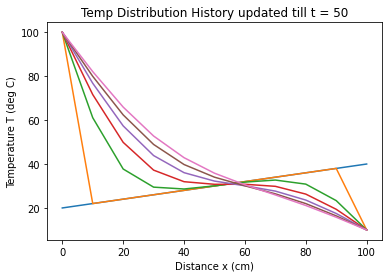

In [ ]:
# Solve 1D PDE and plot time-varying temp distribution 
plt.plot(x,y)
t = t_i
T_old = y
while t<=t_f:
  T_new = [T_0]*n
  T_new.append(T_n)
  for i in range(1,n):
    T_new[i] = T_old[i] + (a*dt/(dx**2))*(T_old[i+1]+T_old[i-1]-(2*T_old[i]))
  T_old = T_new
  if (t%10==0): # Update plot every 10 time units
    plt.plot(x,T_new)
    plt.xlabel('Distance x (cm)')
    plt.ylabel('Temperature T (deg C)')
    plt.title('Temp Distribution History updated till t = '+str(t))
  t = t + dt
  display.display(plt.gcf())
  display.clear_output(wait=True)
  sleep(0.5)

###2D

In [ ]:
# Importing Libraries
import copy
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML

In [ ]:
# Consider a square plate
side = 100
n = 10
dx = side/n 
dy = dx
t_i = 0
t_f = 10
dt = 1
a = 10

In [ ]:
# Initial Temp Distribution Function
def T_i(x,y):
  z = ((x + y)/10).astype(int) # Hypothetical
  return z

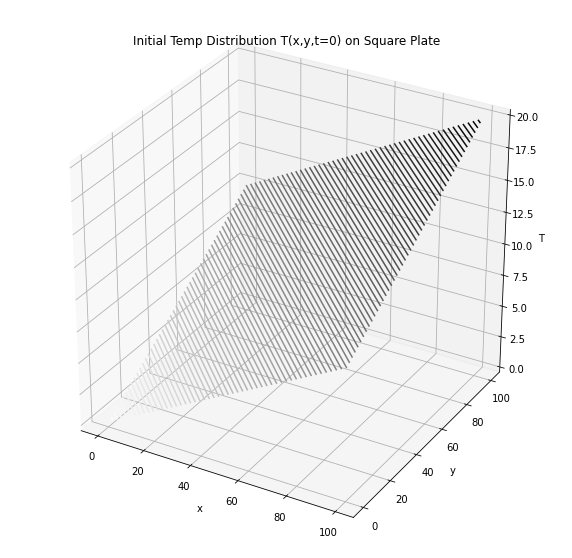

In [ ]:
# 3D contour plot of initial temp distribution
x = np.arange(0,110,10)
y = np.arange(0,110,10)
X, Y = np.meshgrid(x,y)
Z = T_i(X,Y)
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 100, cmap='binary')
ax.set_title('Initial Temp Distribution T(x,y,t=0) on Square Plate')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('T');

In [ ]:
# Dirichlet Boundary Conditions
T_far = 100
T_left = 20
T_right = 20
T_near = 20

In [ ]:
T = np.zeros((n+1, n+1, 10))
t = t_i
T_old = copy.deepcopy(Z)
while t<t_f:
  T_new = T_old
  # Applying Dirichlet Boundary Conditions
  T_new[:,0] = T_left
  T_new[:,-1] = T_right
  T_new[0,:] = T_near
  T_new[-1,:] = T_far
  # Loop to find new Temp at each coordinate
  for i in range(1,n):
    for j in range(1,n):
      T_new[i][j] = T_old[i][j] + (a*dt/(dy**2))*(T_old[i+1][j]+T_old[i-1][j]-(2*T_old[i][j])) + (a*dt/(dx**2))*(T_old[i][j+1]+T_old[i][j-1]-(2*T_old[i][j]))
  T[:,:,t] = T_new
  T_old = T_new
  t = t + dt

In [162]:
# 3D surface plot for temp distribution
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
plot = [ax.plot_surface(X, Y, Z, color='0.75')]
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('T')
# Function to update plot for each frame of animation
def update_plot(fn, z, plot):
  plot[0].remove()
  plot[0] = ax.plot_surface(X, Y, z[:,:,fn], cmap='magma')
  del ax.texts[:]
  ax.text(x = -30, y = 100, z = 110, s = 'Temperature Distribution Surface Plot T(x,y,t='+str(fn)+')')
# Animation showing time-variation of temp distribution
animate = animation.FuncAnimation(fig, update_plot, 10, fargs=(T, plot), interval=1000)
plt.close()
HTML(animate.to_html5_video())